# Using multi class classifier

## Downloading rock, paper, scissor dataset

In [2]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2024-01-01 11:35:37--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.193.59, 142.250.193.251, 216.58.200.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.193.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  3.11MB/s    in 67s     

2024-01-01 11:36:45 (2.84 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2024-01-01 11:36:45--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.193.59, 142.250.193.251, 216.58.200.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.193.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-

In [5]:
# ! mkdir ./rock-paper-scissors-dataset
# ! unzip -q rps.zip -d ./rock-paper-scissors-dataset/training
# ! unzip -q rps-test-set.zip -d ./rock-paper-scissors-dataset/validation
! mv ./rock-paper-scissors-dataset/training/rps/* ./rock-paper-scissors-dataset/training
! mv ./rock-paper-scissors-dataset/validation/rps-test-set/* ./rock-paper-scissors-dataset/validation

zsh:1: no matches found: ./rock-paper-scissors-dataset/training/rps/*


In [11]:
TRAINING_PATH = './rock-paper-scissors-dataset/training/'
VALIDATION_PATH = './rock-paper-scissors-dataset/validation'

## Data preprocessing

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rescale=1/255,
    height_shift_range=0.25,
    width_shift_range=0.25,
    shear_range=0.25,
    rotation_range=25,
    fill_mode='nearest'
)

train_gen = train_data_gen.flow_from_directory(
    TRAINING_PATH,
    batch_size=128,
    class_mode='categorical',
    target_size=(150,150)
)

val_data_gen = ImageDataGenerator(
    rescale=1/255
)

val_gen = val_data_gen.flow_from_directory(
    VALIDATION_PATH,
    batch_size=128,
    class_mode='categorical',
    target_size=(150,150)
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Model Creation

In [19]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 17, 17, 128)      

In [21]:
model.compile(
    optimizer=RMSprop(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Adding callback for optimum training

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs['val_accuracy'] > 0.9):
            print('\n Stopped training on reaching optimum ')
            self.model.stop_training = True

custom_callback = myCallback()

## Model Training

In [23]:
hist_data = model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=[custom_callback])

Epoch 1/20
20/20 [==============================] - 33s 2s/step - loss: 1.0966 - accuracy: 0.3532 - val_loss: 1.0824 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 34s 2s/step - loss: 1.0734 - accuracy: 0.4262 - val_loss: 1.0498 - val_accuracy: 0.3548
Epoch 3/20
20/20 [==============================] - 35s 2s/step - loss: 1.0317 - accuracy: 0.4722 - val_loss: 0.9643 - val_accuracy: 0.6640
Epoch 4/20
20/20 [==============================] - 35s 2s/step - loss: 0.9976 - accuracy: 0.5103 - val_loss: 0.8950 - val_accuracy: 0.4892
Epoch 5/20
20/20 [==============================] - 35s 2s/step - loss: 0.9339 - accuracy: 0.5726 - val_loss: 0.7563 - val_accuracy: 0.7661
Epoch 6/20
20/20 [==============================] - 35s 2s/step - loss: 0.9063 - accuracy: 0.5861 - val_loss: 0.7289 - val_accuracy: 0.7419
Epoch 7/20
20/20 [==============================] - 35s 2s/step - loss: 0.8050 - accuracy: 0.6647 - val_loss: 0.6233 - val_accuracy: 0.8253
Epoch 8/20
20/20 [==

In [24]:
model.save('multi-class-model.keras')

## Plotting Accuracies

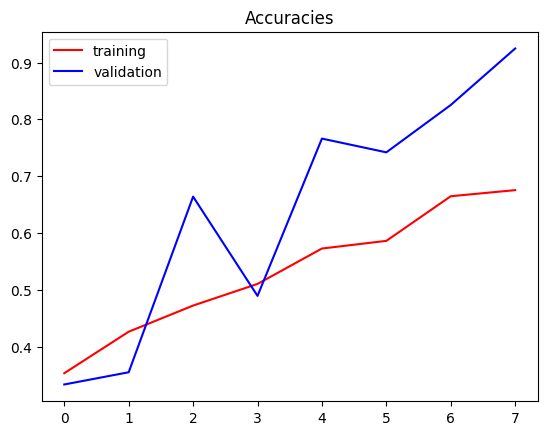

In [25]:
import matplotlib.pyplot as plt

plt.plot(hist_data.history['accuracy'],'r', label='training')
plt.plot(hist_data.history['val_accuracy'], 'b', label='validation')
plt.legend()
plt.title('Accuracies')
plt.show()

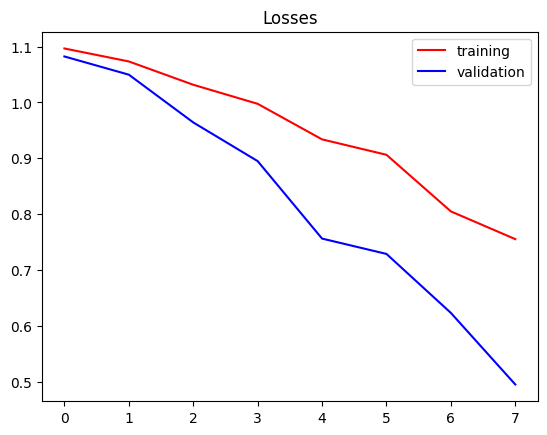

In [26]:
plt.plot(hist_data.history['loss'],'r', label='training')
plt.plot(hist_data.history['val_loss'], 'b', label='validation')
plt.legend()
plt.title('Losses')
plt.show()

## Checking for my hands

In [27]:
from tensorflow.keras.models import load_model

saved_model = load_model('./multi-class-model.keras')
saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 17, 17, 128)      

<PIL.Image.Image image mode=RGB size=2880x1800 at 0x143450D90>


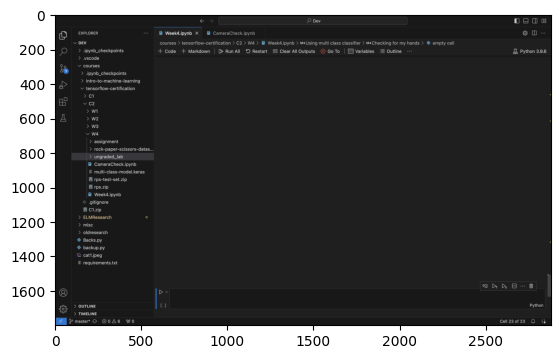

In [29]:
from PIL import ImageGrab

img = ImageGrab.grab()
img_rgb = img.convert('RGB')
print(img_rgb)

plt.imshow(img_rgb)

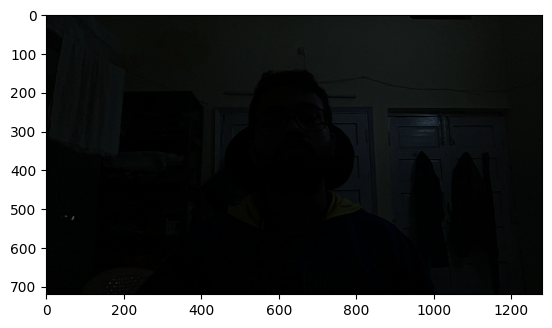

In [55]:
import cv2
from time import sleep

camera = cv2.VideoCapture(0)
ret,frame = camera.read()

sleep(5)

img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img)

camera.release()

In [53]:
from skimage.transform import resize

# Resize with desired dimensions and anti-aliasing
resized_img = resize(img, (150, 150), anti_aliasing=True)

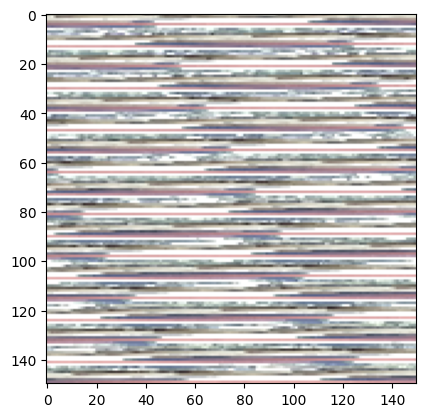

In [50]:
# resized_img = cv2.resize(img, (150,150), interpolation=cv2.INTER_AREA)
# print(type(resized_img), resized_img.shape)
# resized_img = resized_img /255.0

plt.imshow(resized_img)

## Checking on real-world data

<class 'PIL.Image.Image'> (150, 150, 3)


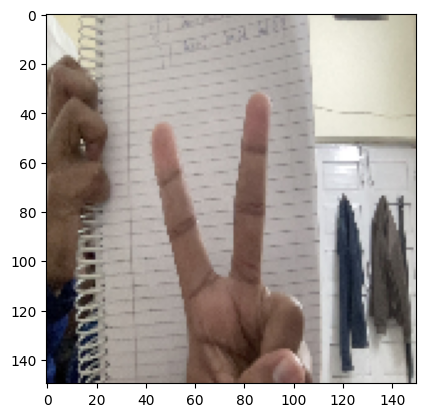

In [63]:
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('./Scissors.jpg', target_size=(150,150))
img_array = img_to_array(img) / 255
print(type(img), img_array.shape)

plt.imshow(img_array)

In [64]:
output_classes = saved_model.predict(img_array.reshape(1,150,150,3))

print(train_gen.class_indices)
print(output_classes)

1/1 [==============================] - 0s 20ms/step
{'paper': 0, 'rock': 1, 'scissors': 2}
[[0.54198664 0.2306431  0.22737029]]


## Lmao

## Testing on images given by the course

In [66]:
! unzip -q rps-validation.zip -d test-images

33


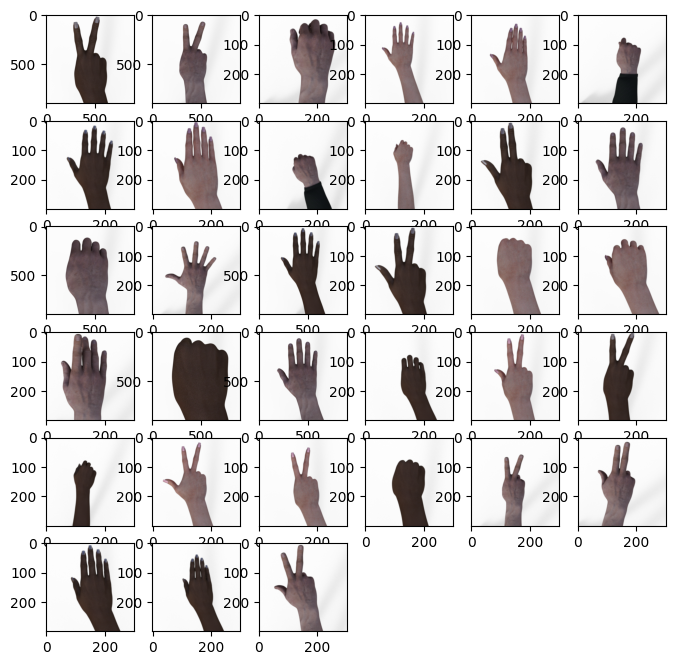

In [72]:
import os

images = os.listdir('./test-images/')
print(len(images))

fig = plt.gcf()
fig.set_size_inches(8,8)

for i,img in enumerate(images):
    img_file = load_img(os.path.join('./test-images/', img))
    plt.subplot(6,6,i+1)
    plt.imshow(img_file)

plt.show()

In [80]:
import numpy as np

img_arrays = []

for img in images:
    img_file = load_img(os.path.join('./test-images/',img), target_size=(150,150))
    img_array = img_to_array(img_file)
    img_arrays.append(img_array)

In [86]:
outputs = saved_model.predict(np.array(img_arrays))
output_classes = np.argmax(outputs,axis=1)
reversed_dict = {value: key for key, value in train_gen.class_indices.items()}
output_str = ""


for output in output_classes:
    output_str += f'{reversed_dict[output]} '

print(output_str)

2/2 [==============================] - 0s 6ms/step
scissors scissors paper scissors scissors rock paper paper rock scissors paper paper rock paper paper scissors rock scissors paper rock paper rock scissors scissors rock scissors scissors rock scissors scissors paper scissors scissors 
